In [98]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [99]:
df = pd.read_csv('raw_sensor_feed.csv')

In [100]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [101]:
df=df.groupby(df['patient_id']).resample('1min').mean().ffill().bfill()
df.reset_index(inplace=True)

In [102]:
df['risk_score'] = (df['heart_rate']/100)+(df['temp_c']-37.0)+((100-df['oxygen_sat'])/10)

In [103]:
df['code_blue']= (df['heart_rate']>120) & (df['risk_score']>3.0)
df.columns

Index(['patient_id', 'timestamp', 'heart_rate', 'oxygen_sat', 'temp_c',
       'risk_score', 'code_blue'],
      dtype='object')

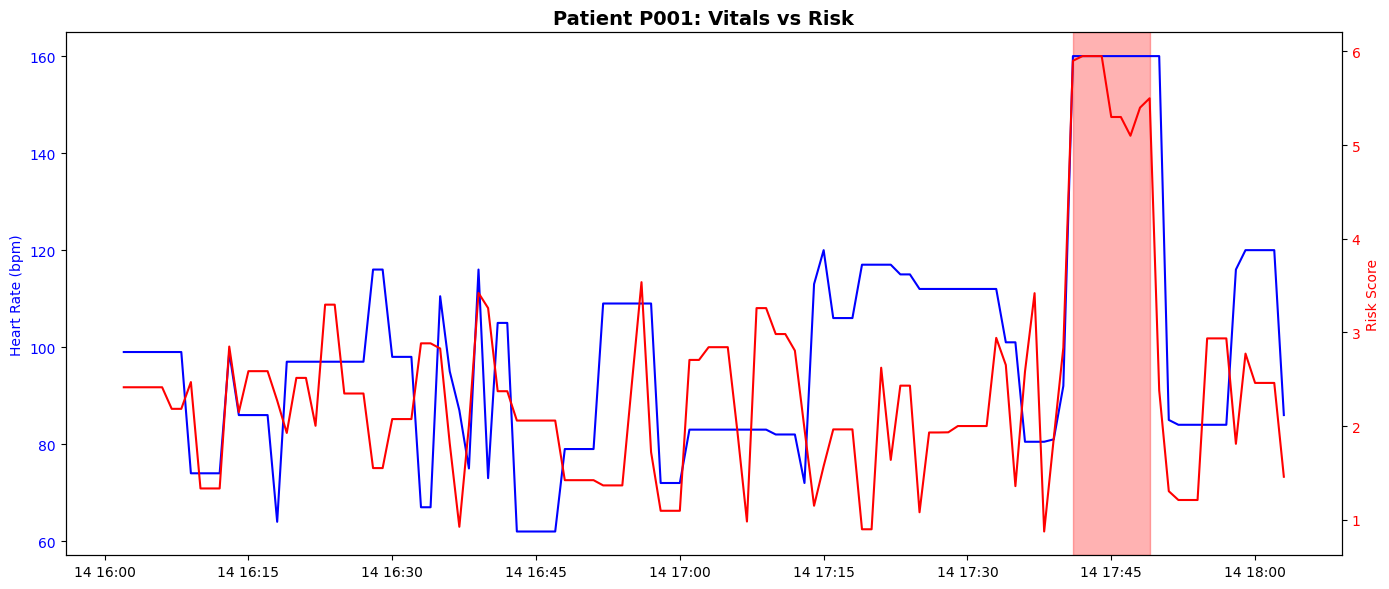

In [104]:

# Create Figure & Primary Axis
# -------------------------------
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-Axis: Heart Rate
ax1.plot(
    df["timestamp"],
    df["heart_rate"],
    color="blue",
    label="Heart Rate (bpm)"
)
ax1.set_ylabel("Heart Rate (bpm)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# -------------------------------
# Secondary Axis: Risk Score
# -------------------------------
ax2 = ax1.twinx()

ax2.plot(
    df["timestamp"],
    df["risk_score"],
    color="red",
    label="Risk Score"
)
ax2.set_ylabel("Risk Score", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# -------------------------------
# KILL ZONE (CODE BLUE)
# -------------------------------
# We shade background only where CODE_BLUE is True
ax1.fill_between(
    df["timestamp"],
    0,1,
    where=df["code_blue"],
    color="red",
    alpha=0.3,
    transform=ax1.get_xaxis_transform()
)

# -------------------------------
# Title & Layout
# -------------------------------
plt.title("Patient P001: Vitals vs Risk", fontsize=14, weight="bold")
fig.tight_layout()

# Show
plt.show()
